# Project Overview

Recommendation systems are a important application of machine learning that aim to provide personalized suggestions to users for products, services, or content they might be interested in. A movie recommendation system is a type of information filterting system used to predict and display movies that a user is likely to enjoy, based on past behavior, preferences, and/or demographic information.  Such systems are widely used on streaming platforms, e-commerce sites, and other online services with  the intention of maximizing the user experience.

There are 3 main types of Recommendation Systems:
 - Collaborative Filtering: This method makes a prediction about the interests of a user by collecting preferences from many other users.  There are two main types of collaborative filtering:
    - User-Based: Recommends movies by finding other users with similar tastes and preferences.
    - Item-Based: Recommends movies by comparing the similarities between different movies.
 - Content-Based Filtering: This method recommends movies by using features of the movie (such as genre, cast, director) and suggests similar movies based on a user's past preferences.
 - Hybrid Recommendation: This method combines both collaborative and content-based filtering.

This project focuses on a hybrid model, which merges the detailed analysis offered by content-based filtering with the broader perspective provided by collaborative filtering. Users are prompted to specify their favorite movie periods and genres, implementing content-based filtering. This is further refined through user ratings on a selection of movies, incorporating collaborative filtering aspects. By adopting this hybrid approach, my aim is to enhance the precision of the recommendations and significantly improve the overall user experience, taking into account the varied and evolving nature of movie preferences.

## Datasets

This project utilizes the MovieLens dataset, a widely used dataset in the field of recommender systems, containing movie ratings and metadata.  The data was obtained at https://www.kaggle.com/datasets/parasharmanas/movie-recommendation-system/data.  There are two data files. The first contains the unique movie Id, movie title and a list of genres the movie falls into.  The second consists of user ratings with the user ID, movie ID, rating and timestap of when the review was made.

## Import Libraries and Read Data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [16]:
movies_df = pd.read_csv('../data/movies.csv')

movies_df.shape

(9742, 3)

In [17]:
ratings_df = pd.read_csv('../data/ratings.csv')

ratings_df.shape

(100836, 4)

# Initial EDA

## Data Overview

In [20]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [22]:
movies_df.describe(include='all')

,movieId,title,genres
count,9742.000000,9742,9742
unique,NaN,9737,951
top,NaN,Emma (1996),Drama
freq,NaN,2,1053
mean,42200.353623,NaN,NaN
std,52160.494854,NaN,NaN
min,1.000000,NaN,NaN
25%,3248.250000,NaN,NaN
50%,7300.000000,NaN,NaN
75%,76232.000000,NaN,NaN


Movies Dataframe Summary:
- There are 9,742 unique movies.
- The genres column has 951 unique genre combinations, with 'Drama' being the most frequent.  The number of genres does not appear resaonable, so will conduct further analysis on.
- The movieId ranges from 1 to 193,609, indicating a broad and possibly sparse numbering system, as there are only 9,737 unique movie titles.

In [24]:
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

There are no missing values in the movies dataset.

In [26]:
movies_df.duplicated().sum()

0

There are no duplicate rows in the movies dataset.

In [28]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [29]:
ratings_df.describe(include='all')

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Ratings Dataframe Summary:
- Contains 100,836 ratings.
- userId ranges from 1 to 610, indicating 610 unique users.
- Ratings range from 0.5 to 5.0, in increments of 0.5.
- The average rating is approximately 3.50.
- timestamp is an integer representing the time the user rating was made.

I will now merge the two datasets which will allow us to see which user rated which movie, along with the movie's title and genres.

In [32]:
# Merge the two df's pn movieId
df = movies_df.merge(ratings_df, on='movieId')

df.shape

(100836, 6)

In [33]:
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [35]:
df.describe(include='all')

,movieId,title,genres,userId,rating,timestamp
count,100836.000000,100836,100836,100836.000000,100836.000000,1.008360e+05
unique,NaN,9719,951,NaN,NaN,NaN
top,NaN,Forrest Gump (1994),Comedy,NaN,NaN,NaN
freq,NaN,329,7196,NaN,NaN,NaN
mean,19435.295718,NaN,NaN,326.127564,3.501557,1.205946e+09
std,35530.987199,NaN,NaN,182.618491,1.042529,2.162610e+08
min,1.000000,NaN,NaN,1.000000,0.500000,8.281246e+08
25%,1199.000000,NaN,NaN,177.000000,3.000000,1.019124e+09
50%,2991.000000,NaN,NaN,325.000000,3.500000,1.186087e+09
75%,8122.000000,NaN,NaN,477.000000,4.000000,1.435994e+09


Combined Dataset Statistics:
- The dataset contains 100,836 ratings for 9,719 unique movies.
- The genres column has 951 unique genre combinations, with 'Comedy' being the most frequent.
- Ratings range from 0.5 to 5.0, with an average of approximately 3.50.

In [37]:
df.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

There are no missing values in the combined dataset

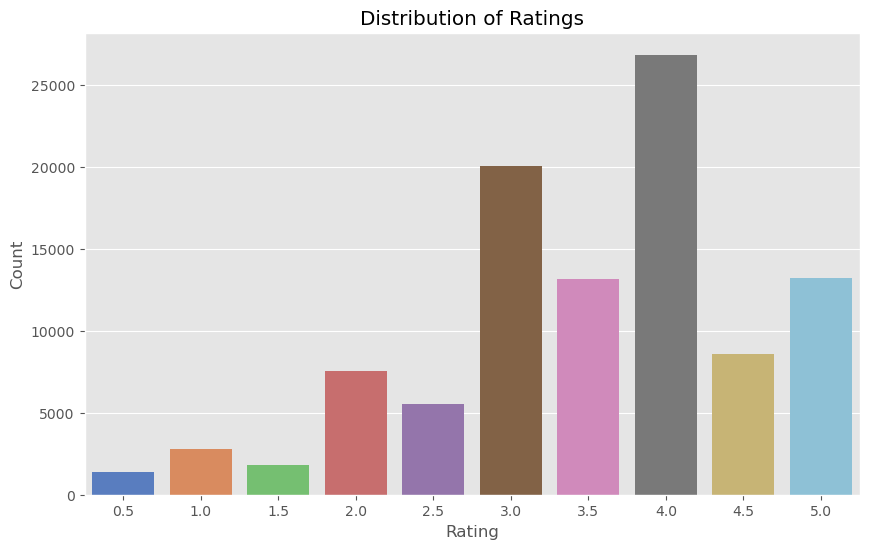

In [39]:
# Plot ratings distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', hue='rating', data=df, legend=False, palette='muted')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


The distribution of ratings shows that:
- Ratings are discrete, in increments of 0.5.
- The most common ratings are around 3.0 to 4.0, indicating a tendency towards higher ratings.
- The extreme ratings (0.5 and 5.0) are less common, suggesting that users are generally moderate in their assessments.

In [41]:
df['genres']

0         Adventure|Animation|Children|Comedy|Fantasy
1         Adventure|Animation|Children|Comedy|Fantasy
2         Adventure|Animation|Children|Comedy|Fantasy
3         Adventure|Animation|Children|Comedy|Fantasy
4         Adventure|Animation|Children|Comedy|Fantasy
                             ...                     
100831                Action|Animation|Comedy|Fantasy
100832                       Animation|Comedy|Fantasy
100833                                          Drama
100834                               Action|Animation
100835                                         Comedy
Name: genres, Length: 100836, dtype: object

In [42]:
# split genres by | and add as a list
df['genres'] = df['genres'].apply(lambda x:x.split('|'))
                                  
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483


In [43]:
df['genres']

0         [Adventure, Animation, Children, Comedy, Fantasy]
1         [Adventure, Animation, Children, Comedy, Fantasy]
2         [Adventure, Animation, Children, Comedy, Fantasy]
3         [Adventure, Animation, Children, Comedy, Fantasy]
4         [Adventure, Animation, Children, Comedy, Fantasy]
                                ...                        
100831                 [Action, Animation, Comedy, Fantasy]
100832                         [Animation, Comedy, Fantasy]
100833                                              [Drama]
100834                                  [Action, Animation]
100835                                             [Comedy]
Name: genres, Length: 100836, dtype: object

In [44]:
# Break out genres included in list and determine count of each
import matplotlib.pyplot as plt

# Explode the genres column to have separate row for each genre
exploded_genres = df.explode('genres')

# Count the occurrences of each genre
genre_counts = exploded_genres['genres'].value_counts()
genre_counts

genres
Drama                 41928
Comedy                39053
Action                30635
Thriller              26452
Adventure             24161
Romance               18124
Sci-Fi                17243
Crime                 16681
Fantasy               11834
Children               9208
Mystery                7674
Horror                 7291
Animation              6988
War                    4859
IMAX                   4145
Musical                4138
Western                1930
Documentary            1219
Film-Noir               870
(no genres listed)       47
Name: count, dtype: int64

C:\Users\trobb\AppData\Local\Temp\ipykernel_4356\1897979922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(genre_counts, kind='bar', palette='muted', height=5, aspect=2)


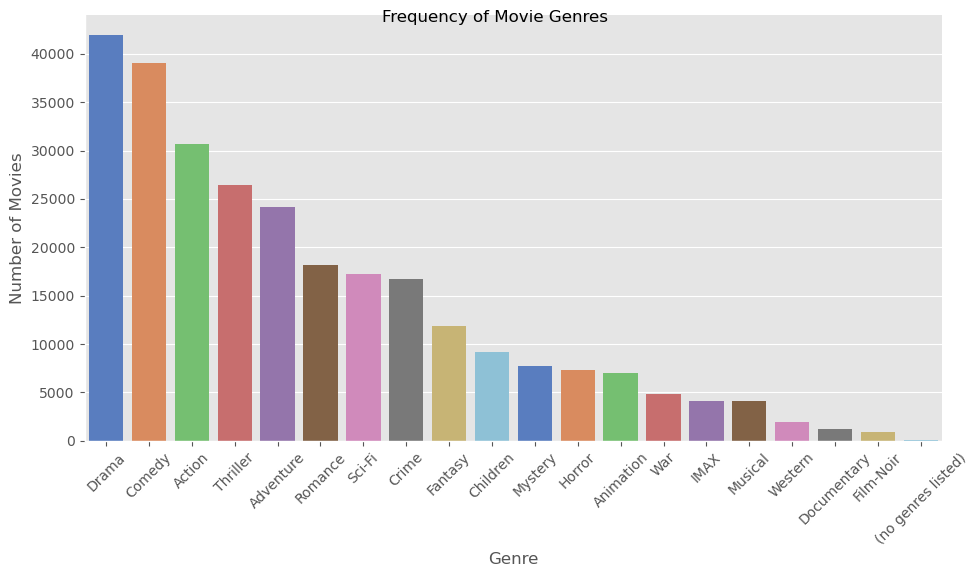

In [45]:
# Plot the genre frequencies

g = sns.catplot(genre_counts, kind='bar', palette='muted', height=5, aspect=2)
g.fig.suptitle('Frequency of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

Drama and Comedy are the most common genres, followed by Action, Thriller, and Adventure.

## Additional EDA

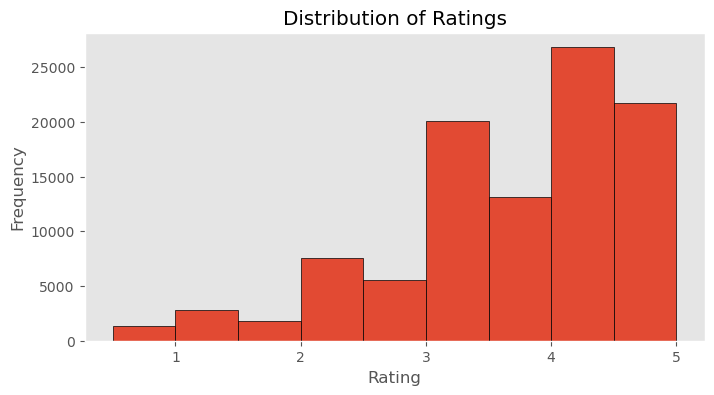

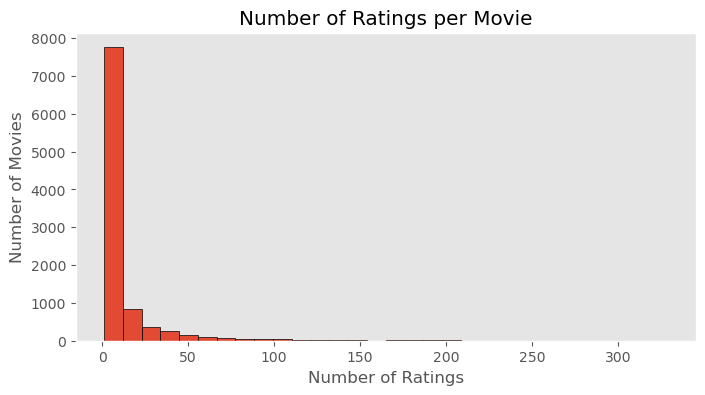

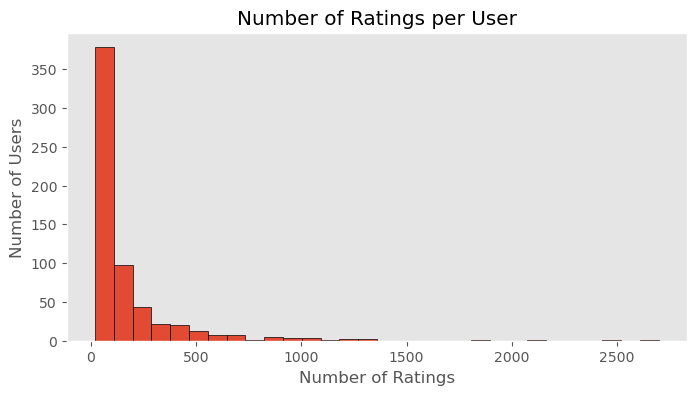

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the 'ratings_df' is already loaded and contains the 'rating', 'movieId', and 'userId' columns

# 1. Distribution of Ratings
plt.figure(figsize=(8, 4))
ratings_df['rating'].hist(bins=9, edgecolor='black', grid=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 2. Number of Ratings per Movie
ratings_per_movie = ratings_df.groupby('movieId').size()
plt.figure(figsize=(8, 4))
ratings_per_movie.hist(bins=30, edgecolor='black', grid=False)
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()

# 3. Number of Ratings per User
ratings_per_user = ratings_df.groupby('userId').size()
plt.figure(figsize=(8, 4))
ratings_per_user.hist(bins=30, edgecolor='black', grid=False)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()


In [49]:
# MOVE TO PREPROCESSING
# Extract year of movie from title

# Regular expression to match a year in parentheses at the end of the title
pattern = r'\((\d{4})\)$'

# Extract the year and create a new column
df['movie_year'] = df['title'].str.extract(pattern, expand=False)

# Optionally, remove the year from the title
df['title'] = df['title'].str.replace(pattern, '').str.strip()

df.head()

df['movie_year'] = df['movie_year'].astype(float)

In [50]:
df.dtypes

movieId         int64
title          object
genres         object
userId          int64
rating        float64
timestamp       int64
movie_year    float64
dtype: object

In [51]:
df.head()

,movieId,title,genres,userId,rating,timestamp,movie_year
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1,4.0,964982703,1995.0
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5,4.0,847434962,1995.0
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",7,4.5,1106635946,1995.0
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",15,2.5,1510577970,1995.0
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",17,4.5,1305696483,1995.0


In [52]:
import pandas as pd

# Load your DataFrame (assuming it's already loaded as df)
# df = pd.read_csv('your_data.csv')

# Convert the 'timestamp' column to datetime
df['date'] = pd.to_datetime(df['timestamp'], unit='s')

# Display the first few rows to verify the conversion
print(df.head())


   movieId             title  \
0        1  Toy Story (1995)   
1        1  Toy Story (1995)   
2        1  Toy Story (1995)   
3        1  Toy Story (1995)   
4        1  Toy Story (1995)   

                                              genres  userId  rating  \
0  [Adventure, Animation, Children, Comedy, Fantasy]       1     4.0   
1  [Adventure, Animation, Children, Comedy, Fantasy]       5     4.0   
2  [Adventure, Animation, Children, Comedy, Fantasy]       7     4.5   
3  [Adventure, Animation, Children, Comedy, Fantasy]      15     2.5   
4  [Adventure, Animation, Children, Comedy, Fantasy]      17     4.5   

    timestamp  movie_year                date  
0   964982703      1995.0 2000-07-30 18:45:03  
1   847434962      1995.0 1996-11-08 06:36:02  
2  1106635946      1995.0 2005-01-25 06:52:26  
3  1510577970      1995.0 2017-11-13 12:59:30  
4  1305696483      1995.0 2011-05-18 05:28:03  


In [53]:
df[df['rating'] > 4.5]

,movieId,title,genres,userId,rating,timestamp,movie_year,date
9,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",31,5.0,850466616,1995.0,1996-12-13 08:43:36
12,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",40,5.0,832058959,1995.0,1996-05-14 07:29:19
13,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",43,5.0,848993983,1995.0,1996-11-26 07:39:43
16,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",46,5.0,834787906,1995.0,1996-06-14 21:31:46
19,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",57,5.0,965796031,1995.0,2000-08-09 04:40:31
...,...,...,...,...,...,...,...,...
100787,187593,Deadpool 2 (2018),"[Action, Comedy, Sci-Fi]",98,5.0,1532457913,2018.0,2018-07-24 18:45:13
100790,187593,Deadpool 2 (2018),"[Action, Comedy, Sci-Fi]",249,5.0,1531611534,2018.0,2018-07-14 23:38:54
100791,187593,Deadpool 2 (2018),"[Action, Comedy, Sci-Fi]",305,5.0,1532877841,2018.0,2018-07-29 15:24:01
100801,187595,Solo: A Star Wars Story (2018),"[Action, Adventure, Children, Sci-Fi]",586,5.0,1529899556,2018.0,2018-06-25 04:05:56


# Movie Recommendations

In [55]:
# Assuming 'movies_df' is already loaded and contains a 'genres' column
# Step 1: Split the genres into a list
movies_df['genre_list'] = movies_df['genres'].str.split('|')

# Step 2: Use Pandas' get_dummies to convert genre lists to a binary matrix
genre_matrix = movies_df['genre_list'].apply(lambda x: pd.Series(1, index=x)).fillna(0)

# Merge this genre_matrix back with the original movies dataframe if needed
movies_with_genres = movies_df.join(genre_matrix)

# Showing the updated DataFrame structure with binary genre columns
movies_with_genres.head()


,movieId,title,genres,genre_list,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


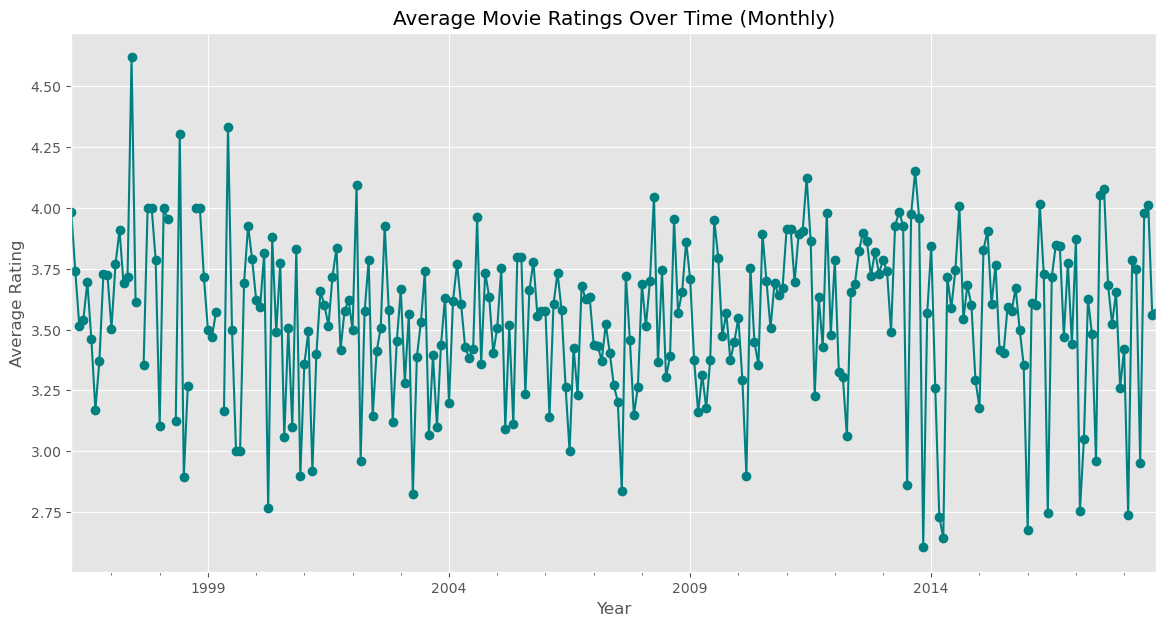

In [56]:
import pandas as pd

# Assuming 'ratings_df' is already loaded and includes 'timestamp' column

# Convert UNIX timestamps to standard datetime format
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

# Set datetime as index
ratings_df.set_index('datetime', inplace=True)

# Resample data to monthly frequency and calculate average ratings
monthly_average_ratings = ratings_df['rating'].resample('M').mean()

# Plotting the trend of average ratings over time
plt.figure(figsize=(14, 7))
monthly_average_ratings.plot(title='Average Movie Ratings Over Time (Monthly)', color='teal', marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


The plot above shows the trend of average movie ratings on a monthly basis. Observing the fluctuations in average ratings over time can provide insights into various factors, such as:
- User Rating Behavior: Changes in average ratings might indicate shifts in user rating behavior or the platform's user base.
- Content Quality: Variations might also reflect the release of particularly popular (or unpopular) movies during certain periods.


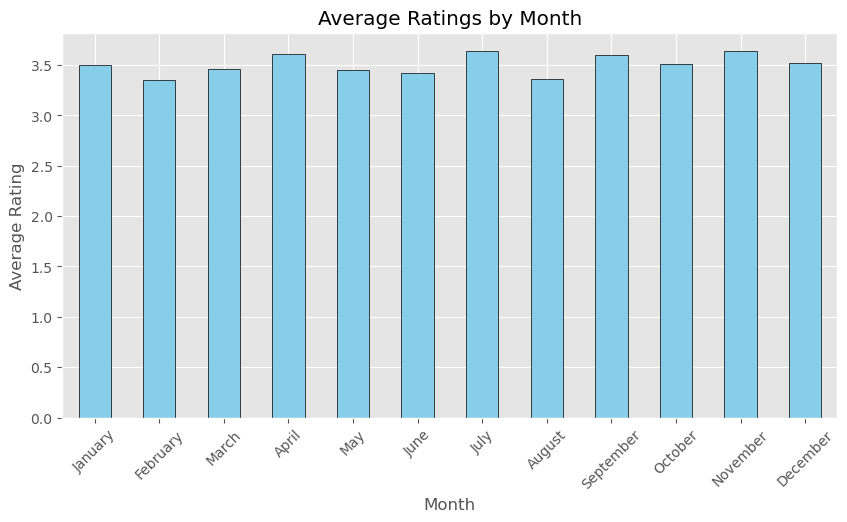

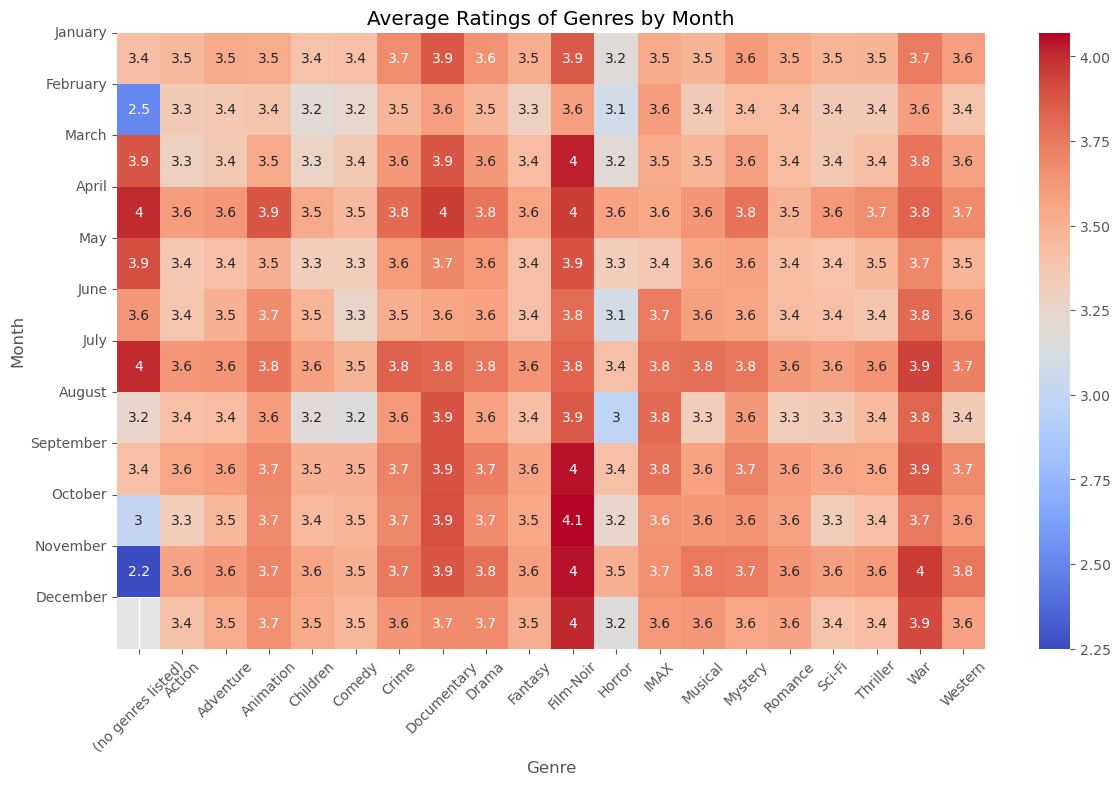

In [58]:
# Extract month from the datetime index to facilitate seasonal analysis
ratings_df['month'] = ratings_df.index.month

# Group by month and calculate average rating for each month
monthly_genre_ratings = ratings_df.groupby('month')['rating'].mean()

# Plotting average ratings by month to identify seasonal trends
plt.figure(figsize=(10, 5))
monthly_genre_ratings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Ratings by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(ticks=range(0, 12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], rotation=45)
plt.show()

# Further analysis: Explore genre popularity by season
# For this, we'll need to merge the ratings with the movies dataframe to include genres
# and then perform a group by operation to see the average ratings of genres by month
merged_df = ratings_df.merge(movies_df, on='movieId')
genre_monthly = merged_df.explode('genre_list').groupby(['month', 'genre_list'])['rating'].mean().unstack()

# Plotting a heatmap of genre popularity by month
plt.figure(figsize=(14, 8))
sns.heatmap(genre_monthly, cmap='coolwarm', annot=True)
plt.title('Average Ratings of Genres by Month')
plt.xlabel('Genre')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.yticks(ticks=range(0, 12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], rotation=0)
plt.show()


**Seasonal Trends in Movie Ratings**
- Average Ratings by Month: The bar chart provides a clear visualization of how average ratings vary by month. Peaks and troughs can suggest periods of high and low engagement or satisfaction, which can be tied to holiday seasons or specific movie releases.
- Genre Popularity by Month: The heatmap shows how different genres perform across months, revealing any seasonal preferences for genres. For example, holiday-themed or blockbuster genres might show distinct patterns during certain months like December or summer months.


In [60]:
stop


NameError: name 'stop' is not defined

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Creating the user-item matrix. Rows will be userIds, columns will be movie titles, and values will be ratings
user_item_matrix = df.pivot_table(index='userId', columns='title', values='rating')

# Replacing NaN values with 0, as we'll calculate cosine similarity
user_item_matrix_filled = user_item_matrix.fillna(0)

# Calculate the cosine similarity matrix (item-item similarity)
item_similarity = cosine_similarity(user_item_matrix_filled.T)  # Transpose to get item-item matrix

# Converting the numpy matrix to a DataFrame for better readability
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix_filled.columns, columns=user_item_matrix_filled.columns)

# Displaying a portion of the similarity matrix
item_similarity_df.iloc[:5, :5]  # Displaying first 5x5 block for brevity

In [ ]:
import random


def get_user_preferences(movies_df):
    # Get movie period preferences
    start_year = int(input("Enter the start year of your preferred movie period: "))
    end_year = int(input("Enter the end year of your preferred movie period: "))

    # Get genre preferences
    print("Please enter your top 3 favorite genres from the following list:")
    all_genres = set(genre for genre_list in movies_df['genres'].str.split('|') for genre in genre_list)
    print(', '.join(sorted(all_genres)))

    top_genres = []
    while len(top_genres) < 3:
        genre = input(f"Enter genre {len(top_genres) + 1}: ").strip()
        if genre in all_genres and genre not in top_genres:
            top_genres.append(genre)
        else:
            print("Invalid genre or duplicate entry. Please try again.")
    
    return start_year, end_year, top_genres

def get_user_ratings(filtered_movies, min_ratings=5):
    print("\nPlease rate at least 5 movies on a scale from 1 to 5. If you haven't seen a movie, just press Enter.")

    sampled_movies = filtered_movies['title'].sample(n=min(len(filtered_movies), min_ratings * 10)).tolist()

    ratings = {}
    while len(ratings) < min_ratings:
        for movie in sampled_movies:
            if movie in ratings:
                continue  # Skip already rated movies

            rating_input = input(f"Rating for '{movie}': ").strip()

            if rating_input == '':
                continue  # Skip unrated movies

            try:
                rating = float(rating_input)
                if 1 <= rating <= 5:
                    ratings[movie] = rating
                else:
                    print("Please enter a number between 1 and 5.")
            except ValueError:
                print("Invalid input. Please enter a valid number or press Enter to skip.")

            if len(ratings) >= min_ratings:
                return ratings

        # Re-sample additional movies if needed
        additional_movies = filtered_movies[~filtered_movies['title'].isin(sampled_movies)]['title'].sample(
            n=min(len(filtered_movies) - len(sampled_movies), min_ratings)).tolist()
        sampled_movies.extend(additional_movies)

    return ratings

# Extract year from the movie title
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)').astype(float)

# Get user preferences
start_year, end_year, top_genres = get_user_preferences(movies_df)

# Filter movies based on year range and genres
filtered_movies = movies_df[
    (movies_df['year'].between(start_year, end_year)) &
    (movies_df['genres'].str.contains('|'.join(top_genres)))
]

# Get user ratings
user_ratings = get_user_ratings(filtered_movies)
print("\nYour ratings:")
for movie, rating in user_ratings.items():
    print(f"{movie}: {rating}")
    
    
def make_recommendations(user_ratings, item_similarity_df, num_recommendations=5):
    # Convert user_ratings to a Series for easier processing
    user_ratings_series = pd.Series(user_ratings)
    
    # Initialize a Series to store the total weighted similarity score of each movie
    total_scores = pd.Series(dtype='float64')

    # Iterate through movies rated by the user and calculate weighted scores
    for movie, rating in user_ratings_series.items():
        # Skip if the movie is not in the similarity matrix
        if movie not in item_similarity_df.columns:
            continue

        # Get similarity scores for the movie
        sim_scores = item_similarity_df[movie]

        # Weighted similarity scores
        weighted_scores = sim_scores * rating

        # Add to the total scores, summing up the weights
        total_scores = total_scores.add(weighted_scores, fill_value=0)

    # Remove movies the user has already rated
    total_scores = total_scores.drop(user_ratings.keys(), errors='ignore')

    # Get top recommendations
    top_recommendations = total_scores.sort_values(ascending=False).head(num_recommendations).index.tolist()

    return top_recommendations

# Example usage
# Assuming 'item_similarity_df' is your precomputed item-item similarity matrix
# and 'user_ratings' is a dictionary containing user's movie ratings
recommended_movies = make_recommendations(user_ratings, item_similarity_df, 5)
print("\nRecommended Movies:")
for movie in recommended_movies:
    print(movie)

